### Imports

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Packages are blocks of code other people have written that allow us to focus on functionality rather than writing everything from scratch.  Some developers focus entirely on writing open source packages for people like us to use while other focus on writing packages for internal proprietary products.

### Load or Create Data

In [ ]:
# df = pd.read_csv("C:/Users/user/Desktop/.csv")

In [3]:
age = [43,21,25,42,57,59]
glucose = [99,65,79,75,87,81]

In [8]:
df = pd.DataFrame(age,columns={'age'})
df['glucose'] = glucose

In [9]:
df

,age,glucose
0,43,99
1,21,65
2,25,79
3,42,75
4,57,87
5,59,81


For the moment this is our toy dataset that shows the age of various people (x) and their glucose levels (y). We want to know what is the line of best for these data points, or in other words if we were going to add a new user, what would be an accurate prediction of their gluclose level? 

For a simple linear function:

y = a + bx

y = dependent variable (predictor)
a = constant (y intercept)
x = independent variable
b = slope

### Calculating the line of best fit

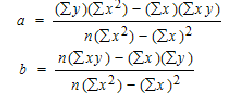

### Plot the Data

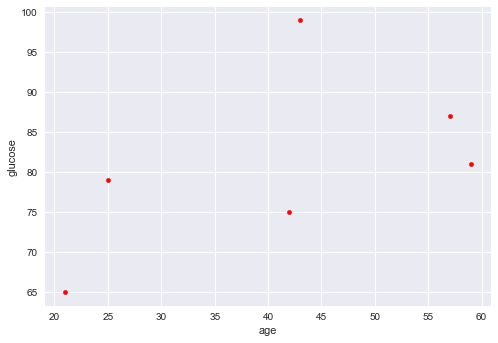

In [106]:
plt.style.use('seaborn')
df.plot(x='age',y='glucose',kind='scatter',color='r');
plt.show()

What line could we draw that would minimize the area of squares from the various points?

In [ ]:
http://setosa.io/ev/ordinary-least-squares-regression/

In [ ]:
https://365datascience.com/sum-squares/

### Diving In:

We could just start coding this with some loops and storing the results in variables, but this would not be ideal. Why?

In [86]:
sum(df['age'])

247

In [87]:
sum(df['glucose'])

486

In [88]:
np.asarray(df['age'])

array([43, 21, 25, 42, 57, 59])

In [90]:
for num in np.asarray(df['age']):
    print (num**2)

1849
441
625
1764
3249
3481


### Writing Functions

Functions are reusable container that performs some operation on objects (lists, arrays, strings, integers, booleans, etc). They will prove vary useful as we move foward with our regression model.  

In [53]:
def multiplyXY(x,y):
    
    return np.asarray(x) * np.asarray(y)

def squareIt(x):
    
    squared_values = []
    for number in x:
        new_value = number**2
        squared_values.append(new_value)
    return squared_values

def squareIt2(x):
    """
    List comprehension
    """
    squared_values = [num**2 for num in x]
    return squared_values

def squareIt3(x):
    """
    Map Lambda Function
    """
    squared_values = list(map(lambda val: val**2, x))
    return squared_values
    

def calculateA(df):
    
    return ?

In [54]:
calculateA(df)

65.14

### Can you write a function for b?

In [ ]:
def calculateB(df):
    return ?

In [85]:
calculateB(df)

0.38522

### Now that we have A & B, can you write a function for Y?

In [116]:
def calculateY(df,new_point):

    return ?

In [117]:
calculateY(df,60)

88.0

### Let's plot y against our original datapoints

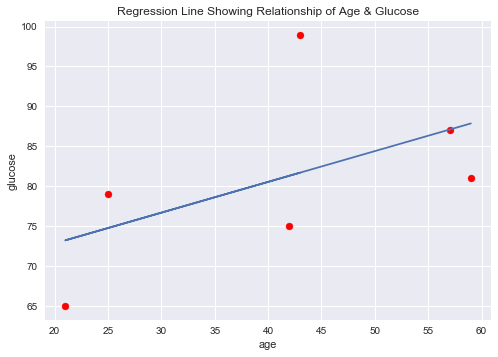

In [123]:
X = df['age']
y = df['glucose']

a = calculateA(df)
b = calculateB(df)

def s(a,b,x):
    return a+(b*x)

fig, ax = plt.subplots()
ax.scatter(X,y,color='red')
ax.plot(np.asarray(X),s(a,b,X))
ax.set_xlabel("age")
ax.set_ylabel("glucose");
ax.set_title("Regression Line Showing Relationship of Age & Glucose");

### So let's generate some new points now that we have the functions

In [131]:
new_people = [24,46,35,55,39]

In [132]:
new_glucose = []
for person in new_people:
    new_glucose.append(calculateY(df,person))
new_glucose

[74.0, 83.0, 79.0, 86.0, 80.0]

### Let's add this back to our original dataset and plot it again

In [133]:
new_ages = age + new_people
glucose_2 = glucose + new_glucose

df = pd.DataFrame(new_ages,columns={'age'})
df['glucose'] = glucose_2
df

,age,glucose
0,43,99.0
1,21,65.0
2,25,79.0
3,42,75.0
4,57,87.0
5,59,81.0
6,24,74.0
7,46,83.0
8,35,79.0
9,55,86.0


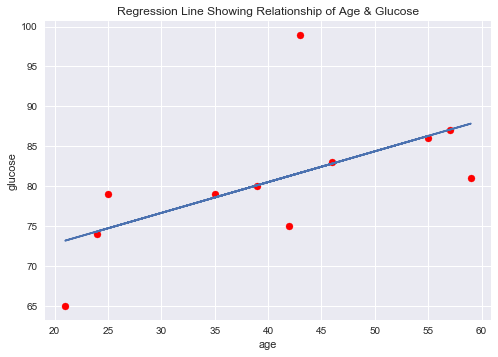

In [134]:
X = df['age']
y = df['glucose']

a = calculateA(df)
b = calculateB(df)

fig, ax = plt.subplots()
ax.scatter(X,y,color='red')
ax.plot(np.asarray(X),s(a,b,X))
ax.set_xlabel("age")
ax.set_ylabel("glucose");
ax.set_title("Regression Line Showing Relationship of Age & Glucose");

Congratulations! This is the line of best fit based on our new datapoints! We have created our first simple linear model.

### Using more robust libraries

In [137]:
import statsmodels.api as sm

In [143]:
df['const'] = 1

In [144]:
regression = sm.OLS(endog=df['glucose'], exog=df[['age','const']])

In [145]:
results= regression.fit()

In [146]:
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                glucose   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     5.067
Date:                Mon, 05 Aug 2019   Prob (F-statistic):             0.0509
Time:                        23:40:26   Log-Likelihood:                -36.287
No. Observations:                  11   AIC:                             76.57
Df Residuals:                       9   BIC:                             77.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.3855      0.171      2.251      0.0

/Users/chaserenick/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


#### Do you remember the equation y = ax+b? 

#### Can you see where in the OLS regression results that information is contained?

In [150]:
print ("calculateA =",a,"\n" "calculateB =", b)

calculateA = 65.1 
calculateB = 0.38555


y = a + bx

y = const + age(x)

#### There is a lot of other valuable information on this chart. 
#### What would be a good evaluation metric for this model? Why?

### Reference Guide:

In [ ]:
def multiplyXY(x,y):
    
    return np.asarray(x) * np.asarray(y)

def squareIt(x):
    
    squared_values = []
    for number in x:
        new_value = number**2
        squared_values.append(new_value)
    return squared_values

def squareIt2(x):
    """
    List comprehension
    """
    squared_values = [num**2 for num in x]
    return squared_values

def squareIt3(x):
    """
    Map Lambda Function
    """
    squared_values = list(map(lambda val: val**2, x))
    return squared_values
    

def calculateA(df):
    x = list(df['age'])
    y = list(df['glucose'])
    
    #Break up dataframe
    rows, columns = df.shape
    
    sumy = sum(y)
    sumxsquared = sum(squareIt(x))
    sumx = sum(x)
    sumxy = sum(multiplyXY(x,y))
    n = rows
    
    a = ((sumy*sumxsquared) - (sumx*sumxy)) / ((n*sumxsquared)-(sumx)**2)
    
    return round(a,2)

def calculateB(df):
    x = list(df['age'])
    y = list(df['glucose'])
    
    #Break up dataframe
    rows, columns = df.shape
    
    sumy = sum(y)
    sumxsquared = sum(squareIt(x))
    sumx = sum(x)
    sumxy = sum(multiplyXY(x,y))
    n = rows
    
    b = (n*(sumxy) - (sumx*sumy)) / ((n*sumxsquared)-(sumx**2))
    return round(b,5)

def calculateY(df,new_point):
    
    a = calculateA(df)
    b = calculateB(df)
    
    y = a+(b*new_point)
    return round(y)